In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
df = df.replace({'Gender': {'Female': 0, 'Male': 1}})

<ipython-input-4-fdbf30488e26>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Gender': {'Female': 0, 'Male': 1}})


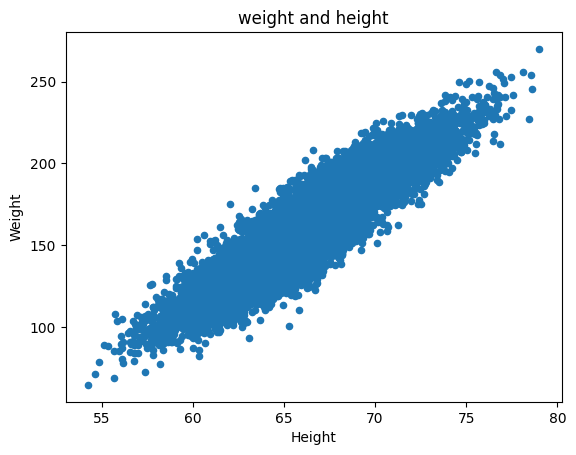

In [ ]:
def plot_human():
  df.plot(kind='scatter', x='Height', y='Weight', title='weight and height')
plot_human()

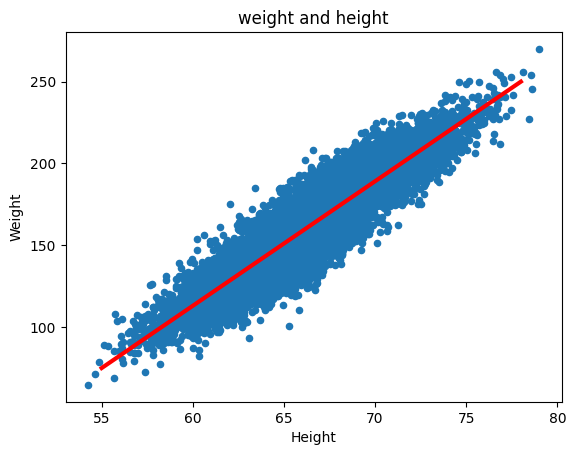

In [ ]:
plot_human()
plt.plot([55,78],[75,250], color = "red", linewidth=3)

In [ ]:
x = df[['Height']].values

In [ ]:
def line(x,w=0,b=0):
  return x*w + b

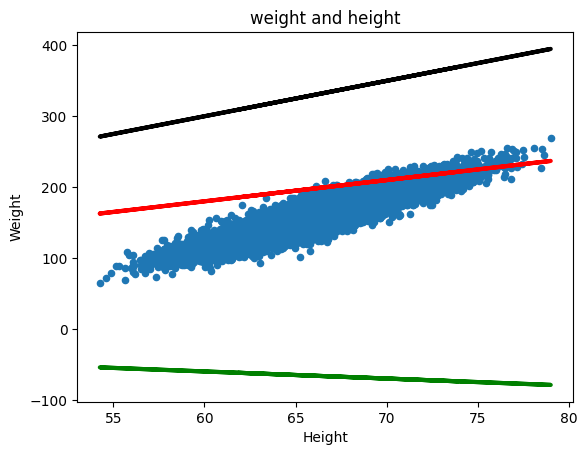

In [ ]:
plot_human()
plt.plot(x,line(x,w=5), color='black',linewidth=3)
plt.plot(x,line(x,w=3), color='red',linewidth=3)
plt.plot(x,line(x,w=-1), color='green',linewidth=3)

In [ ]:
def mean_squared_error(y_true, y_pred):
  mse = (y_true - y_pred) ** 2
  mse = mse.mean()
  return mse

In [ ]:
x

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [63.86799221],
       [69.03424313],
       [61.94424588]])

In [ ]:
y_true = df['Weight'].values
y_pred = line(x,w=2)
mean_squared_error(y_true, y_pred.ravel())

1457.122450478641

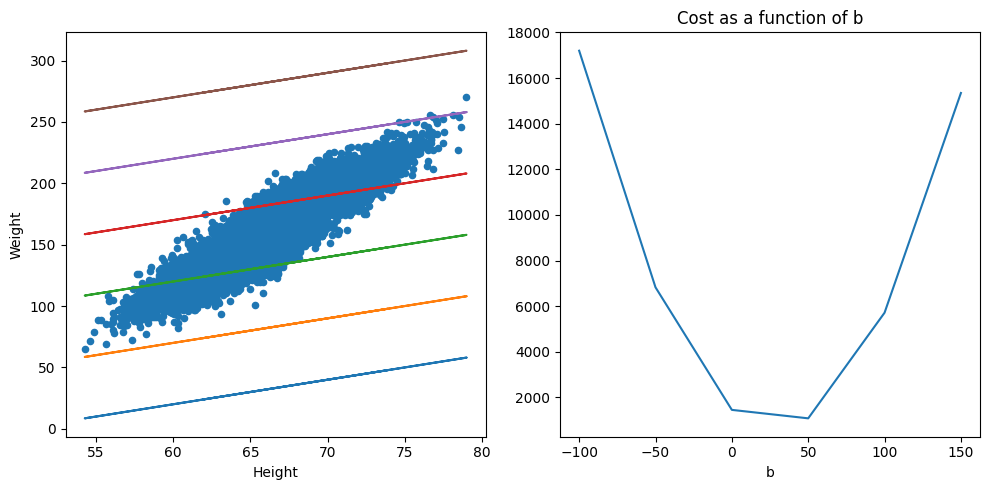

In [ ]:
plt.figure(figsize=(10,5))
ax1 = plt.subplot(121)
df.plot(kind='scatter', x='Height', y='Weight', ax=ax1)
bbs = np.array([-100,-50,0,50,100,150])
mses = []
for b in bbs:
  y_pred = line(x,w=2,b=b)
  mse = mean_squared_error(y_true, y_pred.ravel())
  mses.append(mse)
  plt.plot(x,y_pred)

ax2 = plt.subplot(122)
plt.plot(bbs, mses)
plt.title('Cost as a function of b')
plt.xlabel('b')
plt.tight_layout()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(1,input_shape=(1,)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(Adam(0.8),'mean_squared_error')

In [ ]:
model.fit(x,y_true,epochs=40,verbose=1)

In [ ]:
y_pred = model.predict(x)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


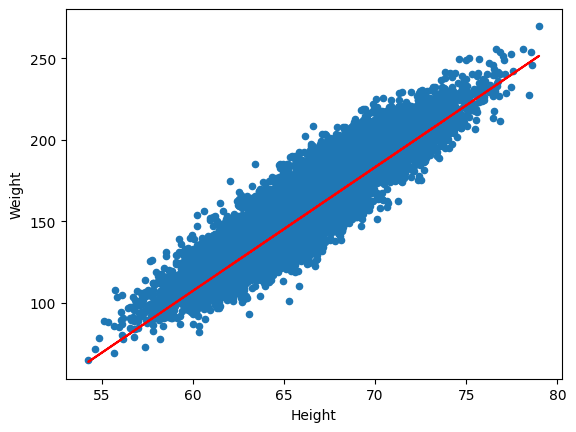

In [ ]:
df.plot(kind='scatter',x='Height',y='Weight')
plt.plot(x,y_pred,color='red')

In [ ]:
W,B = model.get_weights()

In [ ]:
B

array([-348.34833], dtype=float32)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r = r2_score(y_true,y_pred)
print("The R2 score is {:0.3f}".format(r))

The R2 score is 0.823


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(x,y_true,test_size=0.2)

In [ ]:
len(X_train)

8000

In [ ]:
model.fit(X_train,y_train,epochs=50,verbose=1)

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 176.2552
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 178.3841
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 170.9594
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 180.9743
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 165.5925
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 171.6685
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 202.2435
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 182.2673
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 183.9559
Epoch 10/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 176.5603
Epoch 11/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 172.8925
Epoch 12/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 194.5322
Epoch 13/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 168.0400
Epoch 14/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 170.5044
Epoch 15/50
250/250 ━━━━━━━━━

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
from sklearn.metrics import mean_squared_error as mse

In [ ]:
err = mse(y_train,y_train_pred)
err

161.8210026194441

In [ ]:
err = mse(y_test,y_test_pred)
err

167.84930810407755

In [ ]:
df = pd.read_csv('/content/user_visit_duration.csv')
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


<Axes: title={'center': 'Purchase vs time spent'}, xlabel='Time (min)', ylabel='Buy'>

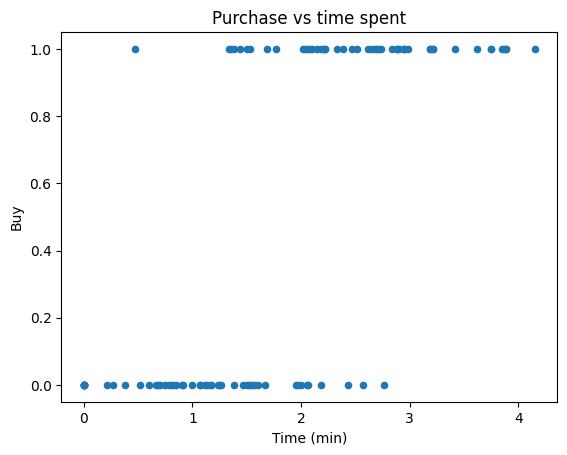

In [ ]:
df.plot(kind='scatter',x='Time (min)',y='Buy', title='Purchase vs time spent')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD

In [ ]:
model2 = Sequential()

In [ ]:
model2.add(Dense(1,input_shape=(1,)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
x = df['Time (min)'].values
y = df['Buy'].values

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
model2.compile(Adam(0.8),'mean_squared_error')

In [ ]:
model2.fit(X_train,y_train,epochs=200,verbose=0)

In [ ]:
y_train_pred = model2.predict(X_train)
y_test_pred = model2.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [ ]:
err = mse(y_train,y_train_pred)
err

0.19826893508434296

In [ ]:
err = mse(y_test,y_test_pred)
err

0.26366934180259705

Try add Activation

In [ ]:
import matplotlib
import pytest
import sklearn
import scipy
import seaborn as sns
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams



In [ ]:
bw = np.random.binomial(1,0.5, size=(10,10))

In [ ]:
bw

array([[1, 0, 1, 1, 1, 0, 1, 0, 1, 1],
       [1, 1, 1, 1, 1, 1, 0, 1, 1, 0],
       [1, 0, 1, 1, 1, 1, 0, 0, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1, 1],
       [1, 0, 1, 0, 1, 1, 0, 1, 0, 1],
       [1, 1, 0, 1, 1, 1, 1, 0, 0, 1],
       [0, 1, 0, 1, 0, 1, 1, 0, 0, 0],
       [1, 0, 1, 1, 0, 0, 1, 1, 1, 1],
       [0, 1, 1, 0, 1, 1, 0, 0, 1, 1],
       [0, 0, 1, 1, 1, 0, 0, 1, 1, 1]])

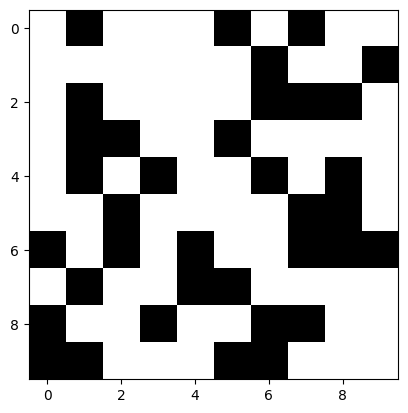

In [ ]:
plt.imshow(bw, cmap='gray')

In [ ]:
gs = np.random.randint(0,256, size=(10,10))

In [ ]:
gs

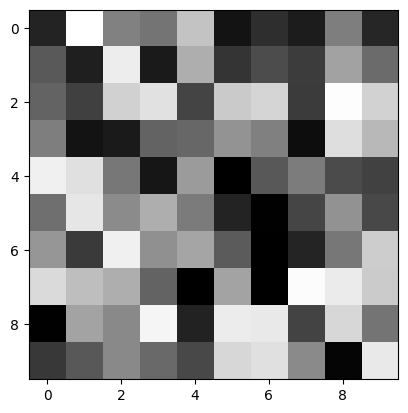

In [ ]:
plt.imshow(gs, cmap='gray')

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
first_img = X_train[0]

In [ ]:
first_img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

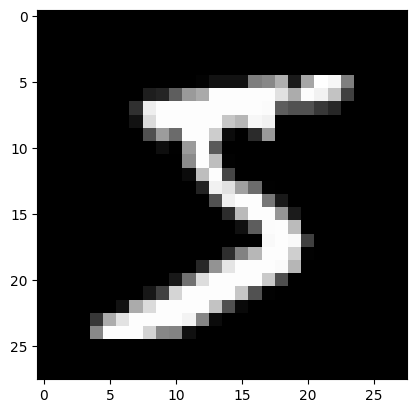

In [ ]:
plt.imshow(first_img, cmap='gray')

In [ ]:
X_train_flat = X_train.reshape(60000,784)
X_test_flat = X_test.reshape(10000,784)

In [ ]:
X_test_flat = X_test.reshape(-1 ,28*28)

In [ ]:
X_train_flat.max()

255

In [ ]:
X_train_sc = X_train_flat.astype('float32')/255.0
X_test_sc = X_test_flat.astype('float32')/255.0

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [ ]:
y_train[0]

5

In [ ]:
y_train_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(512,input_dim=784,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 570,602 (2.18 MB)

 Trainable params: 570,602 (2.18 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
h = model.fit(X_train_sc, y_train_cat, batch_size=128, epochs=10, verbose=1, validation_split=0.1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8169 - loss: 0.5742 - val_accuracy: 0.9657 - val_loss: 0.1145
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9678 - loss: 0.1075 - val_accuracy: 0.9737 - val_loss: 0.0914
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9797 - loss: 0.0660 - val_accuracy: 0.9785 - val_loss: 0.0714
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9860 - loss: 0.0452 - val_accuracy: 0.9822 - val_loss: 0.0659
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9899 - loss: 0.0327 - val_accuracy: 0.9803 - val_loss: 0.0781
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9918 - loss: 0.0266 - val_accuracy: 0.9805 - val_loss: 0.0790
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9942 - loss: 0.0208 - val_accuracy: 0.9832 - val_loss: 0.0708
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9951 - loss: 0.0156 - val_accuracy: 0.

Text(0.5, 0, 'Epochs')

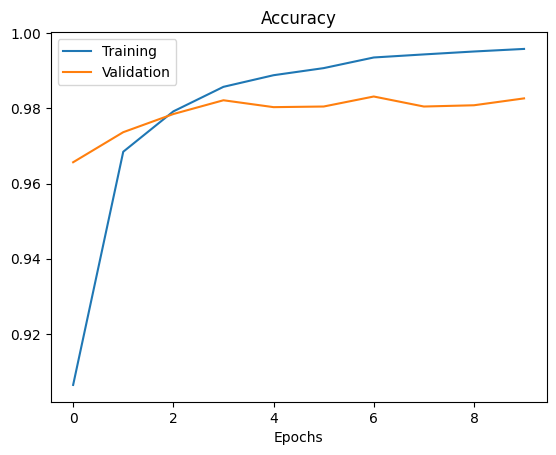

In [ ]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')

In [ ]:
test_acc = model.evaluate(X_test_sc, y_test_cat)[1]
test_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9759 - loss: 0.1247


0.9796000123023987

In [ ]:
train_acc = model.evaluate(X_train_sc, y_train_cat)[1]
train_acc

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9969 - loss: 0.0086


0.9955833554267883

# 9th Jan

In [ ]:
import matplotlib
import pytest
import sklearn
import scipy
import seaborn as sns
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.utils import to_categorical

In [ ]:
from tensorflow.keras.layers import Activation, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

In [ ]:
num_labels = len(np.unique(y_train))
num_labels

10

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
image_size = x_train.shape[1]
image_size

28

In [ ]:
x_train.max()

255

In [ ]:
x_train = x_train.astype('float32')/ 255.0
x_test = x_test.astype('float32')/ 255.0

In [ ]:
input_shape = (image_size,image_size,1)
batch_size = 128
kernel_size = 3
pool_size = 2
filters = 64
dropout = 0.2

In [ ]:
model = Sequential()
model.add(Conv2D(filters=filters,kernel_size=kernel_size,activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,kernel_size=kernel_size,activation='relu'))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,kernel_size=kernel_size,activation='relu'))
model.add(Flatten())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(Dropout(dropout))

In [ ]:
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,770 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,266 (313.54 KB)

 Trainable params: 80,266 (313.54 KB)

 Non-trainable params: 0 (0.00 B)

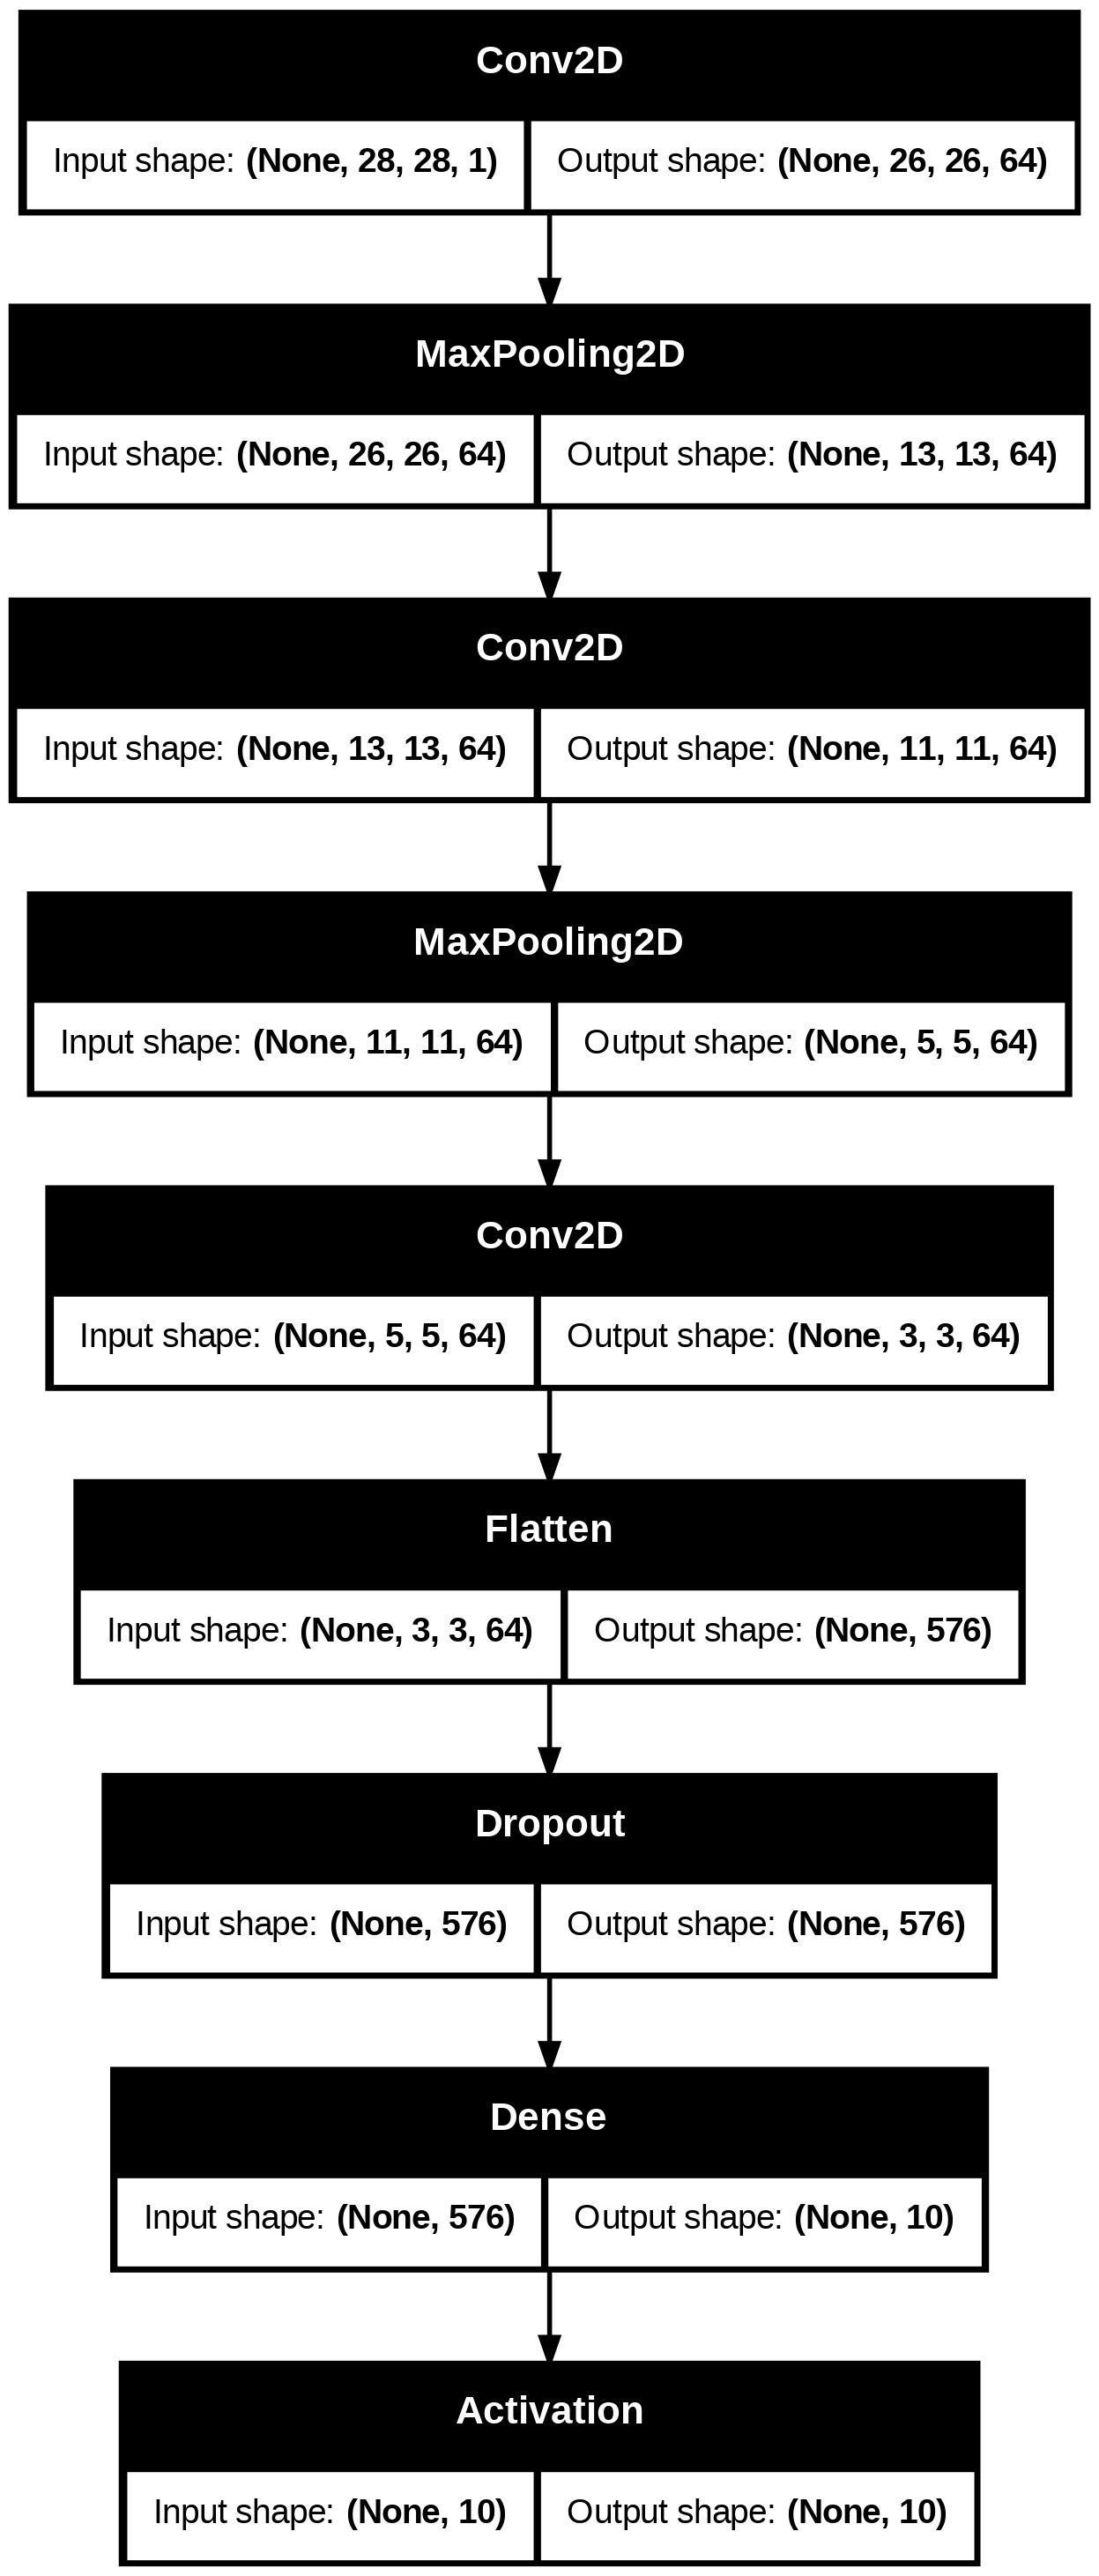

In [ ]:
plot_model(model,to_file='cnn-mnist.png', show_shapes= True)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=20,batch_size=batch_size)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8079 - loss: 0.6000
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9760 - loss: 0.0752
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9830 - loss: 0.0512
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9877 - loss: 0.0396
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9894 - loss: 0.0327
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9916 - loss: 0.0255
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9927 - loss: 0.0222
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9929 - loss: 0.0223
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9945 - loss: 0.0174
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9949 - loss: 0.0159
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9958 - loss: 0.0141
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step

In [ ]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9915 - loss: 0.0306


[0.02375907078385353, 0.993399977684021]

In [ ]:
import tensorflow.keras.datasets as datasets
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
import tensorflow.keras.optimizers as optimizers
from tensorflow.keras.utils import to_categorical, plot_model
import tensorflow.keras.callbacks
import numpy as np
import pandas as pd
from tensorflow.image import rgb_to_grayscale



In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train= x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = rgb_to_grayscale(x_train)
x_test = rgb_to_grayscale(x_test)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
num_labels = len(np.unique(y_train))
num_labels

10

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
image_size = x_train.shape[1]
image_size

32

In [ ]:
x_train.shape

TensorShape([50000, 32, 32, 1])

In [ ]:
print(x_train.dtype)

<dtype: 'float32'>


In [ ]:
if x_train.dtype != 'float32':
    x_train = x_train.astype('float32')  # Convert to float32 if not already
x_train /= 255.0
if x_test.dtype != 'float32':
    x_test = x_test.astype('float32')
x_test /= 255.0

In [ ]:
input_shape = (image_size,image_size,1)
batch_size = 128
epochs = 30
classes = 10
validation_split = 0.1
optim= tensorflow.keras.optimizers.Adagrad(learning_rate=0.01)

In [ ]:
model = models.Sequential()
model.add(layers.Convolution2D(6, (5, 5), activation='tanh', input_shape=input_shape))
model.add(layers.AveragePooling2D(pool_size=(2,2),strides=2))
model.add(layers.Convolution2D(16, (5, 5), activation='tanh'))
model.add(layers.AveragePooling2D(pool_size=(2,2),strides=2))
model.add(layers.Convolution2D(120, (5, 5), activation='tanh'))
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='tanh'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 1, 1, 120)           │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 84)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

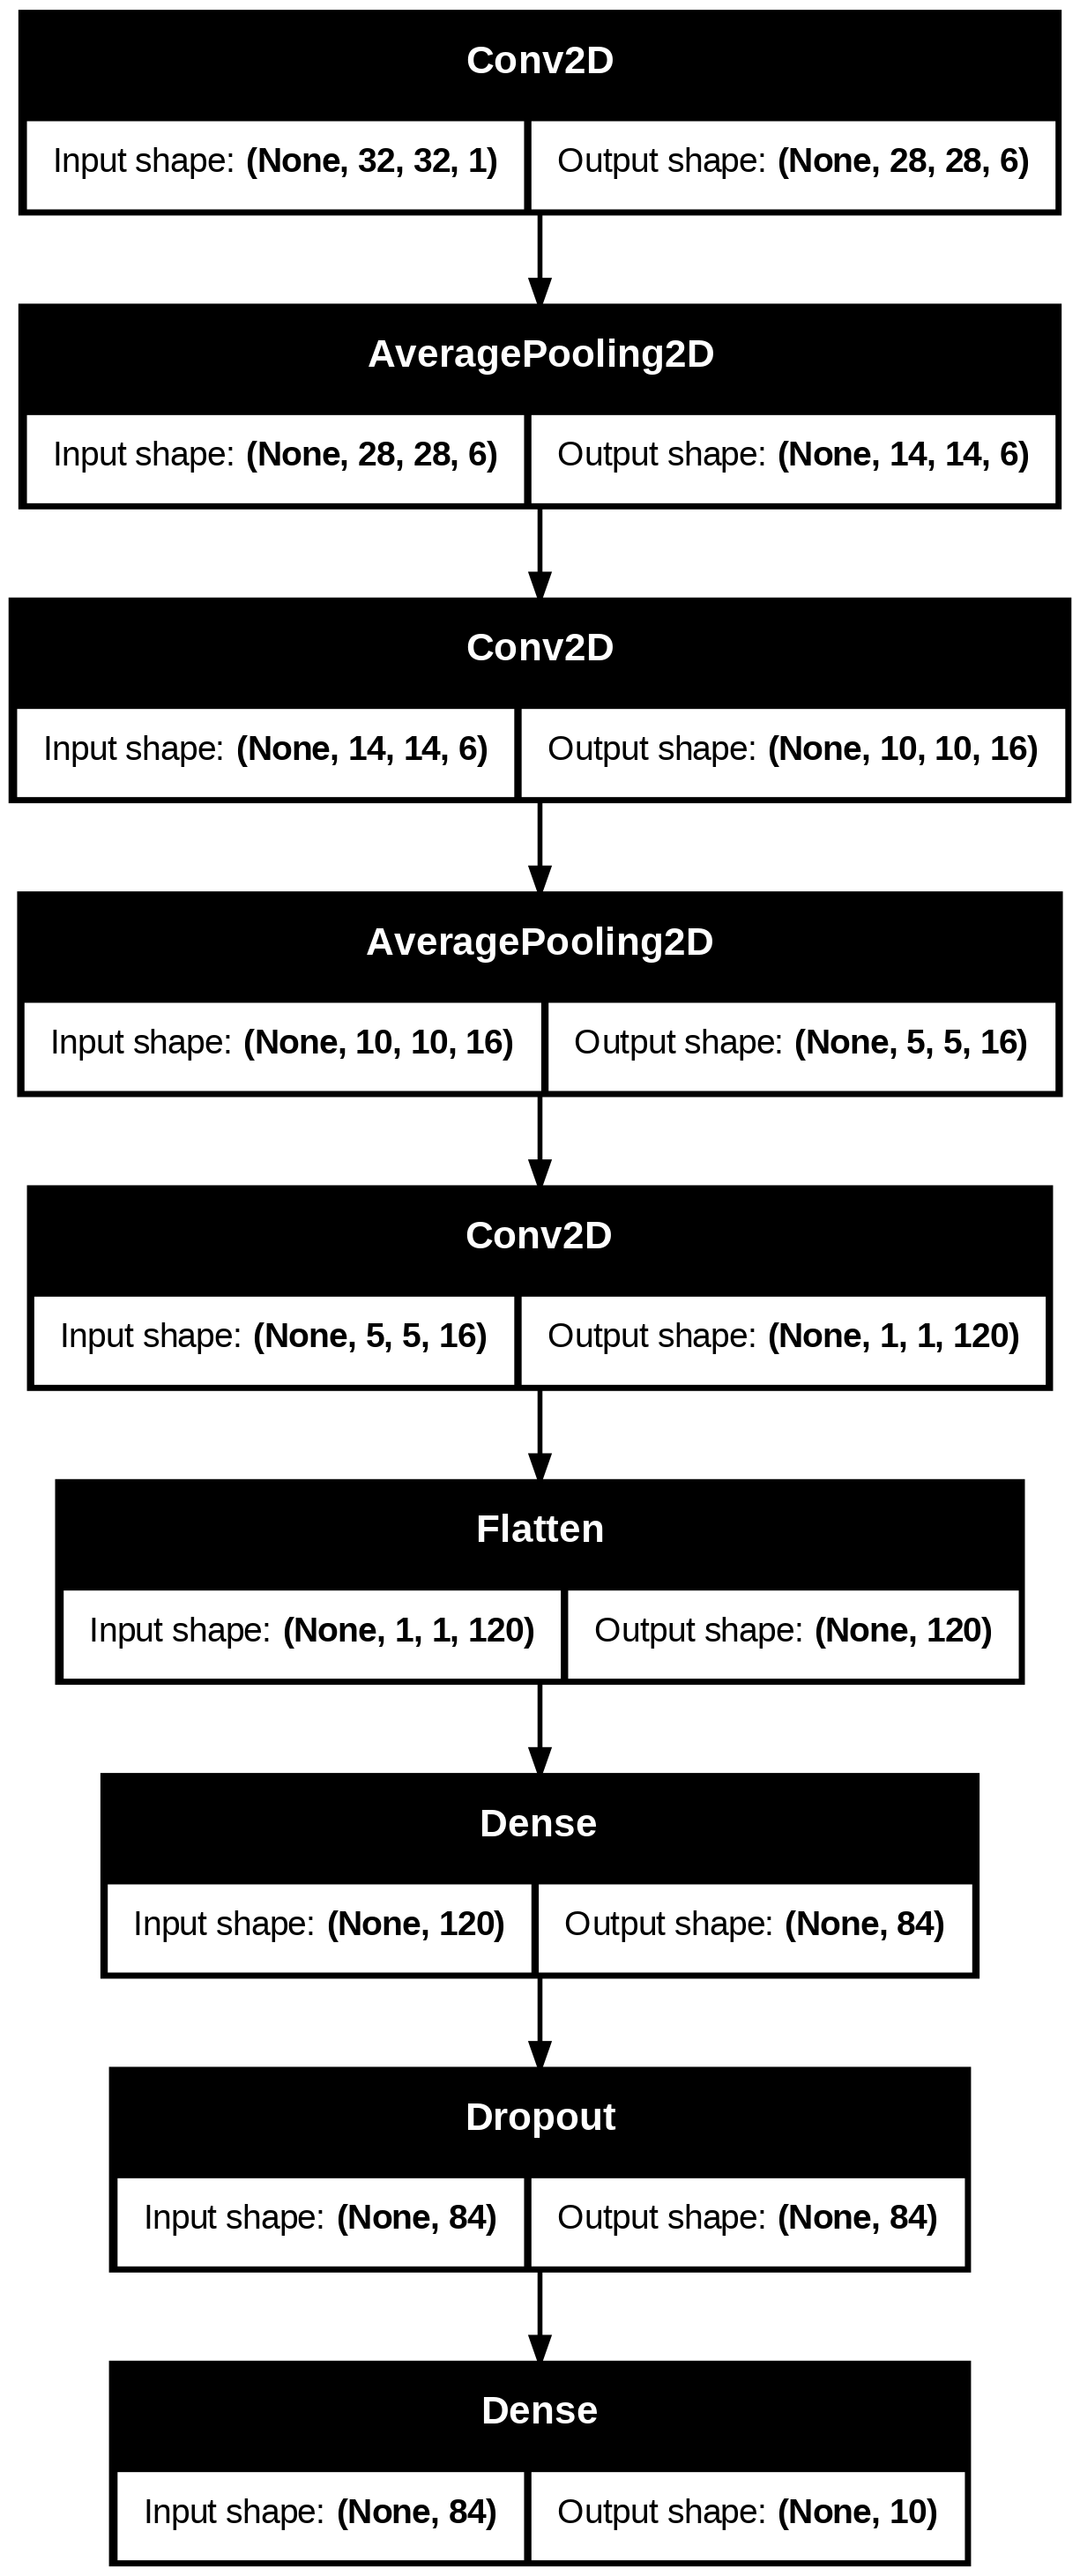

In [ ]:
plot_model(model,to_file='cnn-c100.png', show_shapes= True)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=30,batch_size=batch_size)

Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.2154 - loss: 2.1597
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2774 - loss: 2.0420
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2897 - loss: 2.0115
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3020 - loss: 1.9916
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3013 - loss: 1.9827
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3061 - loss: 1.9739
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3060 - loss: 1.9723
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3138 - loss: 1.9596
Epoch 9/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3194 - loss: 1.9338
Epoch 10/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3463 - loss: 1.8700
Epoch 11/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3546 - loss: 1.8345
Epoch 12/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [ ]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4584 - loss: 1.5284


[1.5401396751403809, 0.45489999651908875]

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(
rotation_range = 15,
width_shift_range = 0.1,
height_shift_range = 0.1,
horizontal_flip = True)

# 10th Jan

In [ ]:
import tensorflow.keras.datasets as datasets
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
import tensorflow.keras.optimizers as optimizers
from tensorflow.keras.utils import to_categorical, plot_model
import tensorflow.keras.callbacks
import numpy as np
import pandas as pd
from tensorflow.image import rgb_to_grayscale



In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar100.load_data()

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [ ]:
x_train= x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = rgb_to_grayscale(x_train)
x_test = rgb_to_grayscale(x_test)

In [ ]:
if x_train.dtype != 'float32':
    x_train = x_train.astype('float32')  # Convert to float32 if not already
x_train /= 255.0
if x_test.dtype != 'float32':
    x_test = x_test.astype('float32')
x_test /= 255.0

In [ ]:
image_size = x_train.shape[1]
image_size

32

In [ ]:
input_shape = (image_size,image_size,1)
batch_size = 32
epochs = 30
classes = 10
validation_split = 0.1
optim= tensorflow.keras.optimizers.Adagrad(learning_rate=0.01)

In [ ]:
model = models.Sequential()
model.add(layers.Convolution2D(6, (5, 5), activation='tanh', input_shape=input_shape))
model.add(layers.AveragePooling2D(pool_size=(2,2),strides=2))
model.add(layers.Convolution2D(16, (5, 5), activation='tanh'))
model.add(layers.AveragePooling2D(pool_size=(2,2),strides=2))
model.add(layers.Convolution2D(120, (5, 5), activation='tanh'))
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='tanh'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 1, 1, 120)           │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 84)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=30,batch_size=batch_size)

Epoch 1/30


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 1), output.shape=(None, 10)

In [ ]:
import tensorflow.keras.datasets as datasets
import tensorflow.keras.models as model
import tensorflow.keras.layers as layers
import tensorflow.keras.optimizers as optimizers
from tensorflow.keras.utils import to_categorical, plot_model
import tensorflow.keras.callbacks
import numpy as np
import pandas as pd

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train= x_train.astype('float32')
x_test = x_test.astype('float32')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


In [ ]:
num_labels = len(np.unique(y_train))
num_labels

10

In [ ]:
image_size = x_train.shape[1]
image_size

32

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_train= x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
input_shape = (image_size,image_size,1)
batch_size = 128
epochs = 10
classes = 10
validation_split = 0.1
optim= tensorflow.keras.optimizers.Adagrad(learning_rate=0.01)

In [ ]:
import tensorflow.keras.datasets as datasets
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
import tensorflow.keras.optimizers as optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.image import rgb_to_grayscale
import tensorflow.keras.callbacks
import numpy as np
import pandas as pd

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(96, (11, 11), activation='relu', input_shape=input_shape))
model.add(layers.ZeroPadding2D(padding=(1, 1)))
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=2))
model.add(layers.Conv2D(256, (5, 5), activation='relu'))
model.add(layers.ZeroPadding2D(padding=(1, 1)))
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=1))
model.add(layers.Conv2D(384, (3, 3), activation='relu'))
model.add(layers.Conv2D(384, (3, 3), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.ZeroPadding2D(padding=(1, 1)))
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 22, 22, 96)          │          11,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ zero_padding2d (ZeroPadding2D)       │ (None, 24, 24, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 11, 11, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 7, 7, 256)           │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ zero_padding2d_1 (ZeroPadding2D)     │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 5, 5, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 3, 3, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 1, 1, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ zero_padding2d_2 (ZeroPadding2D)     │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │       1,052,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          40,970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,598,922 (82.39 MB)

 Trainable params: 21,598,922 (82.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
x_train = rgb_to_grayscale(x_train)
x_test = rgb_to_grayscale(x_test)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=10,batch_size=batch_size)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.1512 - loss: 2.2014
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.3249 - loss: 1.8196
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.3925 - loss: 1.6670
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.4410 - loss: 1.5571
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.4729 - loss: 1.4810
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.4974 - loss: 1.4185
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.5168 - loss: 1.3697
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.5346 - loss: 1.3146
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.5529 - loss: 1.2732
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.5715 - loss: 1.2161


In [ ]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5300 - loss: 1.3830


[1.4048340320587158, 0.5228999853134155]

In [ ]:
import tensorflow.keras.datasets as datasets
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
import tensorflow.keras.optimizers as optimizers
from tensorflow.keras.utils import to_categorical, plot_model
import tensorflow.keras.callbacks
import tensorflow.keras.optimizers as optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.image import rgb_to_grayscale
import numpy as np
import pandas as pd

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train= x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
x_train = rgb_to_grayscale(x_train)
x_test = rgb_to_grayscale(x_test)

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
def VGG_16(input_shape = x_train[1:], classes=10):
    model = models.Sequential()
    model.add(layers.ZeroPadding2D((1,1),input_shape=(32,32,3)))
    model.add(layers.Convolution2D(64, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2), strides=(2,2)))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(128, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2), strides=(2,2)))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(256, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(256, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2), strides=(2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))
    return model

In [ ]:
callback =[tensorflow.keras.callbacks.TensorBoard(log_dir='./logs')]

In [ ]:
model = VGG_16(input_shape = x_train[1:], classes=10)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/zero_padding2d.py:72: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size=128,callbacks=callback, validation_split=0.1)

Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 32s 68ms/step - accuracy: 0.1613 - loss: 2.2299 - val_accuracy: 0.5210 - val_loss: 1.3097
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 27s 42ms/step - accuracy: 0.5480 - loss: 1.2456 - val_accuracy: 0.6652 - val_loss: 0.9295
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.6813 - loss: 0.8974 - val_accuracy: 0.7276 - val_loss: 0.7887
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.7538 - loss: 0.7089 - val_accuracy: 0.7654 - val_loss: 0.6911
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.7980 - loss: 0.5754 - val_accuracy: 0.7846 - val_loss: 0.6595
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.8311 - loss: 0.4800 - val_accuracy: 0.7830 - val_loss: 0.6854
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - accuracy: 0.8640 - loss: 0.3916 - val_accuracy: 0.8014 - val_loss: 0.6267
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.8872 - loss: 0.3240 - 

In [ ]:
model.evaluate(x_test,y_test, batch_size=128,verbose=1,)

79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7832 - loss: 0.7735


[0.7633862495422363, 0.78329998254776]

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
print('Train image shape', x_train.shape)
print('Test image shape', x_test.shape)

Train image shape (50000, 32, 32, 3)
Test image shape (10000, 32, 32, 3)


In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

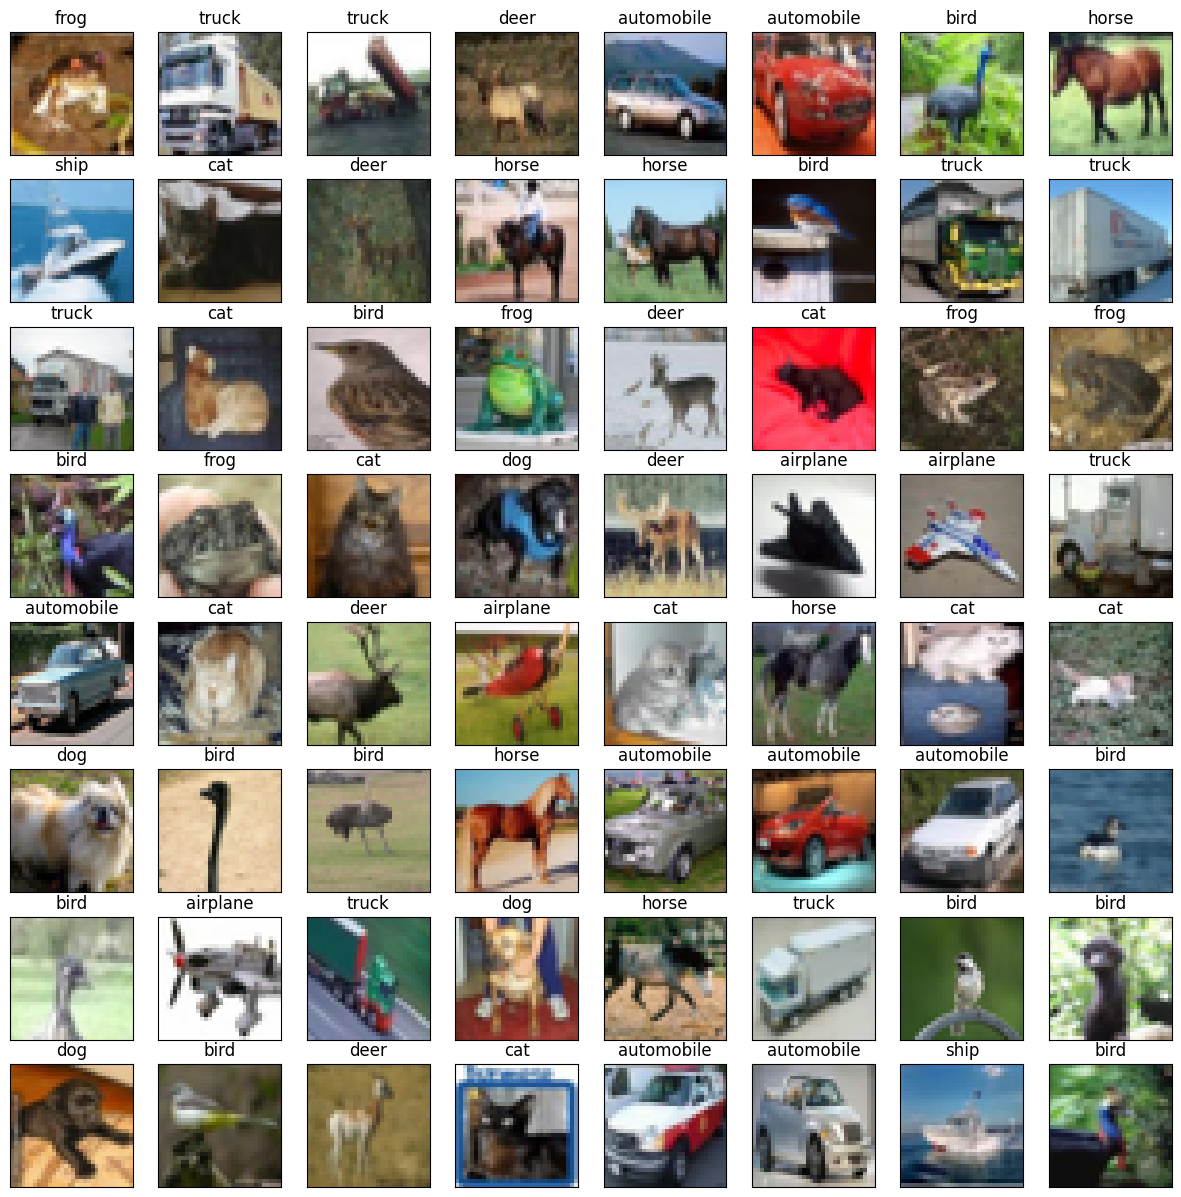

In [ ]:
plt.figure(figsize=(15,15))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(class_names[y_train[i][0]])
    plt.imshow(x_train[i])
plt.show()

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
x_train = tf.keras.applications.resnet50.preprocess_input(x_train)
x_test = tf.keras.applications.resnet50.preprocess_input(x_test)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1)

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(45000, 32, 32, 3)
(45000, 10)
(5000, 32, 32, 3)
(5000, 10)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_generator = ImageDataGenerator(
    rotation_range=16,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    shear_range=0.1,
    zoom_range=0.1,
)

In [ ]:
val_generator = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    shear_range=0.1,
    zoom_range=0.1,
)

In [ ]:
test_generator = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    shear_range=0.1,
    zoom_range=0.1,
)

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.layers import UpSampling2D

inputs = tf.keras.layers.Input(shape=(32, 32, 3))

resized_inputs = UpSampling2D(size=(7, 7))(inputs)

In [ ]:
resnet_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_tensor=resized_inputs)

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout


In [ ]:
for layer in resnet_model.layers:
    layer.trainable = False

NUM_LAYERS_TO_UNFREESE = 30

for layer in resnet_model.layers[-NUM_LAYERS_TO_UNFREESE:]:
  layers.trainable = True


x = GlobalAveragePooling2D()(resnet_model.output)
x = Dense(1024,activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(512,activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(256,activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
classification_output = Dense(10, activation='softmax', name = 'classification')(x)

In [ ]:
optimizer = tf.keras.optimizers.Adam()

resnet_model.compile(optimizer=optimizer,
                     loss = 'categorical_crossentropy',
                     metrics=['accuracy'])

resnet_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d_1           │ (None, 224, 224, 3)    │              0 │ input_layer_3[0][0]    │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ up_sampling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1, min_lr=0.0001, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights= True, verbose=1)

batch_size = 64
epochs = 2

In [ ]:
x_train.shape

(45000, 32, 32, 3)

In [ ]:
from tensorflow.image import rgb_to_grayscale

In [ ]:
x_train = rgb_to_grayscale(x_train)
x_test = rgb_to_grayscale(x_test)
x_val = rgb_to_grayscale(x_val)

In [ ]:
history = resnet_model.fit(
    train_generator.flow(x_train, y_train, batch_size=batch_size),
    epochs=epochs,
    steps_per_epoch=x_train.shape[0] // batch_size,
    validation_data=val_generator.flow(x_val, y_val),
    callbacks=[reduce_lr, early_stopping],
    shuffle=True
)

Epoch 1/2


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None, 10), output.shape=(None, 7, 7, 2048)

# Jan 11th

In [ ]:
import tensorflow as tf
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models
import tensorflow.keras.optimizers
from tensorflow.keras.utils import to_categorical, plot_model
import tensorflow.keras.callbacks
import numpy as np
import pandas as pd
import requests
import zipfile
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
kaggle_username = "username"
kaggle_key = "key"

In [ ]:
model